<a href="https://colab.research.google.com/github/J0SAL/Labs/blob/main/SC-IT312/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!python --version

Python 3.7.12


In [95]:
import numpy as np 
import matplotlib.pyplot as plt

In [96]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

### Defining the derivative to be used for back propogation 

In [97]:
def sigmoid_backward(x):
    return x * (1 - x)

### Input datasets

In [98]:
input_array = np.array([[0.9,0.4],[0,1],[-0.2,0],[0,-1],[0.2,0.3],[-0.2,0.5],[0.1,-0.9],[-0.2,-0.5]])
target_array = np.array([[1],[0],[1],[0],[1],[0],[1],[0]])

In [99]:
epochs = 70
l_rate = 0.01
input_Layer, hidden_Layer, output_Layer = 2,2,2
error = []

### Random weights and bias initialization using numpy random uniform distribution

In [100]:
hidden_weights = np.random.uniform(size=(input_Layer,hidden_Layer))
hidden_bias =np.random.uniform(size=(1,hidden_Layer))
output_weights = np.random.uniform(size=(hidden_Layer,output_Layer))
output_bias = np.random.uniform(size=(1,output_Layer))


### looking at the initial weights and biases produced by the random uniform distribution

In [101]:
print("Start hidden weights:\n ",hidden_weights)
print("Start hidden biases:\n ",hidden_bias)
print("Start output weights:\n ",output_weights)
print("Start output biases:\n ",output_bias)

Start hidden weights:
  [[0.84339823 0.85584881]
 [0.16140265 0.53428787]]
Start hidden biases:
  [[0.75553061 0.25922463]]
Start output weights:
  [[0.63601    0.86374274]
 [0.4093106  0.60867845]]
Start output biases:
  [[0.30979195 0.14710544]]


### Training algorithm to repeat for the number of epochs mentioned above

In [102]:
for i in range(epochs):
    #Forward Propagation of the network
    hidlayer_activation = np.dot(input_array,hidden_weights)
    hidlayer_activation = hidlayer_activation + hidden_bias
    hidlayer_output = sigmoid(hidlayer_activation)
    

    outlayer_activation = np.dot(hidlayer_output,output_weights)
    outlayer_activation = outlayer_activation + output_bias
    pred_output = sigmoid(outlayer_activation)

    #Backpropagation for the network
    e = target_array - pred_output
    d_pred_output = e * sigmoid_backward(pred_output)
        
    error_hidden_layer = d_pred_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_backward(hidlayer_output)
    
    # Updating Weights and Biases after back propogation
    output_weights = output_weights + hidlayer_output.T.dot(d_pred_output) * l_rate
    output_bias = output_bias + np.sum(d_pred_output,axis=0,keepdims=True) * l_rate
    hidden_weights = hidden_weights + input_array.T.dot(d_hidden_layer) * l_rate
    hidden_bias = hidden_bias + np.sum(d_hidden_layer,axis=0,keepdims=True) * l_rate
    error.append(abs(np.mean(e)))


### looking at the final weights and biases after the training algo 

Final hidden weights:  [[0.8633854  0.87064503]
 [0.15911171 0.53267673]]
Final hidden bias:  [[0.67855876 0.20729704]]
Final output weights:  [[0.49826272 0.71380585]
 [0.29838806 0.48726402]]
Final output bias:  [[ 0.08398355 -0.09519094]]
Interation	|	Error
1	|	0.23734890775546674
2	|	0.2360235829989415
3	|	0.2346982554313925
4	|	0.23337304085645
5	|	0.23204805497082123
6	|	0.23072341331293394
7	|	0.22939923121183642
8	|	0.22807562373640813
9	|	0.22675270564493194
10	|	0.22543059133508164
11	|	0.2241093947943735
12	|	0.22278922955113348
13	|	0.2214702086260277
14	|	0.22015244448420423
15	|	0.2188360489880928
16	|	0.217521133350906
17	|	0.2162078080908882
18	|	0.21489618298635105
19	|	0.213586367031539
20	|	0.21227846839336206
21	|	0.2109725943690337
22	|	0.20966885134464963
23	|	0.20836734475474097
24	|	0.20706817904283437
25	|	0.20577145762304877
26	|	0.20447728284275746
27	|	0.20318575594634236
28	|	0.20189697704006426
29	|	0.2006110450580721
30	|	0.19932805772957254
31	|	0.198048

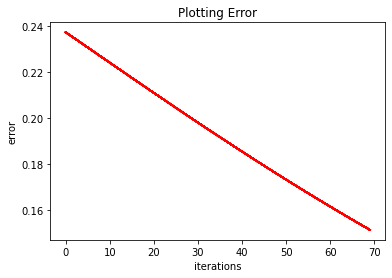

In [103]:
print("Final hidden weights: ",hidden_weights)
print("Final hidden bias: ",hidden_bias)
print("Final output weights: ",output_weights)
print("Final output bias: ",output_bias)


print("Interation\t|\tError")
for i in range(len(error)):
    print(str(i+1)+"\t|\t"+str(error[i]))
    plt.plot(error,'-r')    
    
    
#naming the x axis
plt.xlabel('iterations')
#naming the y axis
plt.ylabel('error')

#giving a title to my graph
plt.title('Plotting Error')

#function to show the plot
plt.show()
